In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

# Preprocess the data to a csv format

In [2]:
train = pd.read_json(r'common_sense_qa\train_rand_split.jsonl', lines=True)
dev = pd.read_json(r'common_sense_qa\dev_rand_split.jsonl', lines=True)
def preprocess_data(df):
    df = pd.concat([df,df.question.apply(pd.Series)], axis = 1)
    df = pd.concat([df,df.choices.apply(pd.Series)], axis = 1) 
    df = df.drop(columns = ['choices','question'])
    def get_answears(row):
        return [col['text'] for col in row]
    answers_df = df[[0,1,2,3,4]].apply(get_answears)
    answers_df.columns = ['A','B','C','D','E']
    df = pd.concat([df,answers_df], axis = 1)
    df = df.drop(columns = range(5))
    return df
train = preprocess_data(train)
dev = preprocess_data(dev)
train.head(2)

,answerKey,id,question_concept,stem,A,B,C,D,E
0,A,075e483d21c29a511267ef62bedc0461,punishing,The sanctions against the school were a punish...,ignore,enforce,authoritarian,yell at,avoid
1,B,61fe6e879ff18686d7552425a36344c8,people,Sammy wanted to go to where the people were. ...,race track,populated areas,the desert,apartment,roadblock


# Verify that the data is mostly balanced

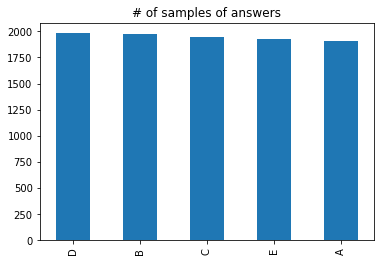

In [3]:
train['answerKey'].value_counts().plot.bar(title = '# of samples of answers')

# Export to csv

In [4]:
train.to_csv('train.csv', index = False)
dev.to_csv('dev.csv', index = False)